In [ ]:
if 'google.colab' in str(get_ipython()):
  from IPython.display import clear_output
  from google_drive_downloader import GoogleDriveDownloader as gdd
  gdd.download_file_from_google_drive(file_id='17iJMgLywXL8Bt9k1CGqQ6idTcosJpQRO',
  dest_path='./TP2.zip', unzip=True)

else:
  print('Please use colab')

In [ ]:
import numpy as np

# Q1

In [ ]:
pi = np.zeros(2)
pi[0] = 1
pi

array([1., 0.])

# Q2

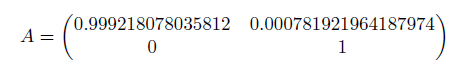

What is the probability to move from state 1 to state 2 ? What is the probability to remain in state 2 ? What is the lower/higher probability ?

- The probability to move from state 1 to state 2 is 0.000781921964187974

- The probability to remain in state 2 is 1

- The lower/higher probability is 0/1

# Q3

The size of B is N*2

# Material

In [ ]:
A  = np.array([[0.999218078035812, 0.000781921964187974], [0, 1]])

In [ ]:
B = np.loadtxt('PerlScriptAndModel/P.text')

In [ ]:
file_path = 'dat/'
data = []

f = open("dat/mail.lst")
lines = f.readlines()
for line in lines:
    try:
      data.append(np.loadtxt(file_path+line.strip(),dtype=int))
    except:
      print('error in : '+line.strip())
f.close()

In [ ]:
for i,file in enumerate(data):
  print(i+1, file.shape)

1 (5216,)
2 (3715,)
3 (3475,)
4 (3993,)
5 (3328,)
6 (6576,)
7 (6808,)
8 (2627,)
9 (3425,)
10 (3077,)
11 (2620,)
12 (3376,)
13 (2434,)
14 (2664,)
15 (3643,)
16 (3750,)
17 (3701,)
18 (3238,)
19 (4467,)
20 (3148,)
21 (2541,)
22 (2890,)
23 (3934,)
24 (5160,)
25 (3424,)
26 (3386,)
27 (3211,)
28 (3848,)
29 (3558,)
30 (8625,)


In [ ]:
def viterbi(X,Pi0,A,B):
    """
        Viterbi Algorithm Implementation

        Keyword arguments:
            - obs: sequence of observation
            - states:list of states
            - start_prob:vector of the initial probabilities
            - trans: transition matrix
            - emission_prob: emission probability matrix
        Returns:
            - seq: sequence of state
    """

    #pour eviter d avoir des valeurs nulles dans le log
    realmin = np.finfo(np.double).tiny
    A = np.log(A+realmin)
    Pi0 = np.log(Pi0+realmin)
    B = np.log(B+realmin)
    taille = np.shape(X) #X.shape[0]
    T = taille[0] #nombre d observations
    N = Pi0.shape[0]#nombre des etats du modele
    print(T,N)
    #Initialisation
    logl = np.zeros((T,N))
    bcktr = np.zeros((T-1,N))
    
    logl[0,:]=Pi0+B[X[0],:]
    pathes = np.zeros((T,N),dtype=int)
    for t in range(1,(T)):
        
        logl[t,:] = np.max(A + logl[t-1,:].reshape(2,1),axis = 0)+B[X[t],:]

        pathes[t,:] = np.argmax(A + logl[t-1,:].reshape(2,1),axis = 0)
    
    ind = np.argmax(logl[-1,:])

    path = np.zeros(T,dtype=int)
    path[T-1] = ind
    for t in range((T-2),-1,-1):
      path[t] = pathes[t+1, path[t+1]]

    return logl, path


In [ ]:
log1, path = viterbi(data[4], pi, A, B)

3328 2


In [ ]:
print(path+1)

[1 1 1 ... 2 2 2]


# Q4

In [ ]:
for i in range(10,30):
  logl, path = viterbi(data[i], pi, A, B)
  f = open(file_path+'path'+str(i+1)+'.txt','w')
  for p in path:
    f.write(str(p+1))

2620 2
3376 2
2434 2
2664 2
3643 2
3750 2
3701 2
3238 2
4467 2
3148 2
2541 2
2890 2
3934 2
5160 2
3424 2
3386 2
3211 2
3848 2
3558 2
8625 2


In [ ]:
!cp PerlScriptAndModel/codeur.pl ./codeur.pl
!perl PerlScriptAndModel/segment.pl dat/mail12.txt dat/path12.txt

1111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111

# Q5

# Q6

# Q7

In [ ]:
def cal_alpha(X, Pi0, A0, B0):
    realmin = np.finfo(np.double).tiny
    A = np.log(A+realmin)
    Pi0 = np.log(Pi0+realmin)
    B = np.log(B+realmin)
    taille = np.shape(X) #X.shape[0]
    T = taille[0] #nombre d observations
    N = Pi0.shape[0]#nombre des etats du modele
    
    print(T,N)
    #Initialisation
    alpha = np.zeros((T,N))
    
    alpha[0,:]=Pi0+B[X[0],:]

    for i in range(1,T):
      alpha[i,:] = B[X[i-1],:] + np.sum(alpha[i-1,:]+A, axis=1)
    
    return alpha


In [ ]:
def cal_beta(X, Pi0, A0, B0):
    realmin = np.finfo(np.double).tiny
    A = np.log(A+realmin)
    Pi0 = np.log(Pi0+realmin)
    B = np.log(B+realmin)
    taille = np.shape(X) #X.shape[0]
    T = taille[0] #nombre d observations
    N = Pi0.shape[0]#nombre des etats du modele
    
    print(T,N)
    #Initialisation
    beta = np.ones((T,N))

    for i in range(T-2, -1, -1):
      beta[i,:] = np.sum(A + B[X[i+1],:] + beta[i+1,:],axis = 1)
    
    return beta

In [ ]:
def cal_gamma(alpha, beta):
  return alpha + beta / np.sum(alpha + beta, axis = 1)

In [ ]:
# to be continued
def BaumWelch(X,Pi0,A0,B0):
    """
        Baum Welch Algorithm Implementation

        Keyword arguments:
            - X: sequence of observation
            - Pi0:vector of the initial probabilities
            - A0: initial transition matrix
            - B0: initial emission probability matrix
        Returns:
            - seq: sequence of state
            - A
            - B
    """

    #pour eviter d avoir des valeurs nulles dans le log
    realmin = np.finfo(np.double).tiny
    A = np.log(A+realmin)
    Pi0 = np.log(Pi0+realmin)
    B = np.log(B+realmin)
    taille = np.shape(X) #X.shape[0]
    T = taille[0] #nombre d observations
    N = Pi0.shape[0]#nombre des etats du modele
    print(T,N)
    #Initialisation
    logl = np.zeros((T,N))
    bcktr = np.zeros((T-1,N))
    
    logl[0,:]=Pi0+B[X[0],:]
    pathes = np.zeros((T,N),dtype=int)
    for t in range(1,(T)):
        
        logl[t,:] = np.max(A + logl[t-1,:].reshape(2,1),axis = 0)+B[X[t],:]

        pathes[t,:] = np.argmax(A + logl[t-1,:].reshape(2,1),axis = 0)
    
    ind = np.argmax(logl[-1,:])

    path = np.zeros(T,dtype=int)
    path[T-1] = ind
    for t in range((T-2),-1,-1):
      path[t] = pathes[t+1, path[t+1]]

    return logl, path

In [ ]:
B[0,:].shape

(2,)

In [ ]:
A  = np.array([[0.999218078035812, 0.000781921964187974], [0, 1]])  
print(A)  

[[9.99218078e-01 7.81921964e-04]
 [0.00000000e+00 1.00000000e+00]]


In [ ]:
temp = np.ones((1,2))
pi = temp @ np.linalg.inv(A)
pi = pi/np.sqrt(np.sum(pi**2))
print(pi)

[[0.7076599  0.70655323]]
